## Load the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Thesis_A_10/CervicalCancerTrainDataset.zip" -d "./CervicalCancerTrainingDataset/"

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
import cv2
import random
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
from imutils import paths

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import label_binarize
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn import svm, datasets
from sklearn import preprocessing
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import mean_absolute_error, f1_score, precision_score, recall_score, accuracy_score, roc_curve, auc, roc_auc_score

sns.set(style='white', context='notebook', palette='deep')
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)



!pip install -q scikit-plot
import scikitplot as skplt
import pickle
from itertools import cycle
from scipy import interp

In [ ]:
def load(paths, verbose=-1):
    '''expects images for each class in seperate dir, 
    e.g all digits in 0 class in the directory named 0 '''
    # loop over the input images
    for (i, imgpath) in enumerate(paths):
        # load the image and extract the class labels
        im_gray = cv2.imread(imgpath, cv2.IMREAD_GRAYSCALE)
        numpy_image = np.array(im_gray).flatten()
        label = imgpath.split(os.path.sep)[-2] # Metaplastic, Parabasal, Koilocytotic, Superficial-Intermediate, Dyskeratotic
        image = cv2.resize(numpy_image, (28, 28)).astype(np.float32)
        # scale the image to [0, 1] and add to list
        image = image/255
        image = image.reshape(-1)
        df.loc[i, 'pixels_0':] = image
        labels.append(label)
    print(df.head())

In [ ]:
labels = list()
#time nibe
df = pd.DataFrame(columns=range(784)).add_prefix('pixels_')
#declear path to your mnist data folder
img_path = '/content/CervicalCancerTrainingDataset/CervicalCancerTrainDataset'

#get the path list using the path object
image_paths = list(paths.list_images(img_path))

#apply our function
load(image_paths, verbose=10000)

# print(label_list)

   pixels_0  pixels_1  pixels_2  pixels_3  pixels_4  pixels_5  pixels_6  \
0   0.32549   0.32549   0.32549   0.32549   0.32549   0.32549   0.32549   
1  0.219608  0.219608  0.219608  0.219608  0.219608  0.219608  0.219608   
2  0.470588  0.470588  0.470588  0.470588  0.470588  0.470588  0.470588   
3  0.486275  0.486275  0.486275  0.486275  0.486275  0.486275  0.486275   
4  0.333333  0.333333  0.333333  0.333333  0.333333  0.333333  0.333333   

   pixels_7  pixels_8  pixels_9  ... pixels_774 pixels_775 pixels_776  \
0   0.32549   0.32549   0.32549  ...   0.933333   0.933333   0.933333   
1  0.219608  0.219608  0.219608  ...   0.309804   0.309804   0.309804   
2  0.470588  0.470588  0.470588  ...   0.941176   0.941176   0.941176   
3  0.486275  0.486275  0.486275  ...   0.760784   0.760784   0.760784   
4  0.333333  0.333333  0.333333  ...   0.709804   0.709804   0.709804   

  pixels_777 pixels_778 pixels_779 pixels_780 pixels_781 pixels_782 pixels_783  
0   0.933333   0.933333   0.9

In [ ]:
df['label'] = labels

In [ ]:
df["label"] = df["label"].astype('category')
df['label'] = df['label'].cat.codes
df["label"] = df["label"].astype('float')

# SMOTE for balancing data

In [ ]:
X = df.loc[:, df.columns != 'label']
y= df['label']

In [ ]:
X

,pixels_0,pixels_1,pixels_2,pixels_3,pixels_4,pixels_5,pixels_6,pixels_7,pixels_8,pixels_9,...,pixels_774,pixels_775,pixels_776,pixels_777,pixels_778,pixels_779,pixels_780,pixels_781,pixels_782,pixels_783
0,0.32549,0.32549,0.32549,0.32549,0.32549,0.32549,0.32549,0.32549,0.32549,0.32549,...,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333
1,0.219608,0.219608,0.219608,0.219608,0.219608,0.219608,0.219608,0.219608,0.219608,0.219608,...,0.309804,0.309804,0.309804,0.309804,0.309804,0.309804,0.309804,0.309804,0.309804,0.309804
2,0.470588,0.470588,0.470588,0.470588,0.470588,0.470588,0.470588,0.470588,0.470588,0.470588,...,0.941176,0.941176,0.941176,0.941176,0.941176,0.941176,0.941176,0.941176,0.941176,0.941176
3,0.486275,0.486275,0.486275,0.486275,0.486275,0.486275,0.486275,0.486275,0.486275,0.486275,...,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784,0.760784
4,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,...,0.709804,0.709804,0.709804,0.709804,0.709804,0.709804,0.709804,0.709804,0.709804,0.709804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4044,0.286275,0.286275,0.286275,0.286275,0.286275,0.286275,0.286275,0.286275,0.286275,0.286275,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4045,0.117647,0.117647,0.117647,0.117647,0.117647,0.117647,0.117647,0.117647,0.117647,0.117647,...,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6
4046,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,...,0.776471,0.776471,0.776471,0.776471,0.776471,0.776471,0.776471,0.776471,0.776471,0.776471
4047,0.415686,0.415686,0.415686,0.415686,0.415686,0.415686,0.415686,0.415686,0.415686,0.415686,...,0.737255,0.737255,0.737255,0.737255,0.737255,0.737255,0.737255,0.737255,0.737255,0.737255


In [ ]:
y

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
4044    1.0
4045    1.0
4046    1.0
4047    1.0
4048    1.0
Name: label, Length: 4049, dtype: float64

In [ ]:
# spliting test and training sets by 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_before_smote=X_train
X_test_before_smote=X_test
y_train_before_smote=y_train
y_test_before_smote=y_test

In [ ]:
X_train

,pixels_0,pixels_1,pixels_2,pixels_3,pixels_4,pixels_5,pixels_6,pixels_7,pixels_8,pixels_9,...,pixels_774,pixels_775,pixels_776,pixels_777,pixels_778,pixels_779,pixels_780,pixels_781,pixels_782,pixels_783
3848,0.384314,0.384314,0.384314,0.384314,0.384314,0.384314,0.384314,0.384314,0.384314,0.384314,...,0.705882,0.705882,0.705882,0.705882,0.705882,0.705882,0.705882,0.705882,0.705882,0.705882
1613,0.490196,0.490196,0.490196,0.490196,0.490196,0.490196,0.490196,0.490196,0.490196,0.490196,...,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392
1945,0.309804,0.309804,0.309804,0.309804,0.309804,0.309804,0.309804,0.309804,0.309804,0.309804,...,0.854902,0.854902,0.854902,0.854902,0.854902,0.854902,0.854902,0.854902,0.854902,0.854902
3482,0.270588,0.270588,0.270588,0.270588,0.270588,0.270588,0.270588,0.270588,0.270588,0.270588,...,0.811765,0.811765,0.811765,0.811765,0.811765,0.811765,0.811765,0.811765,0.811765,0.811765
1174,0.494118,0.494118,0.494118,0.494118,0.494118,0.494118,0.494118,0.494118,0.494118,0.494118,...,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.396078,0.396078,0.396078,0.396078,0.396078,0.396078,0.396078,0.396078,0.396078,0.396078,...,0.717647,0.717647,0.717647,0.717647,0.717647,0.717647,0.717647,0.717647,0.717647,0.717647
1294,0.239216,0.239216,0.239216,0.239216,0.239216,0.239216,0.239216,0.239216,0.239216,0.239216,...,0.592157,0.592157,0.592157,0.592157,0.592157,0.592157,0.592157,0.592157,0.592157,0.592157
860,0.254902,0.254902,0.254902,0.254902,0.254902,0.254902,0.254902,0.254902,0.254902,0.254902,...,0.780392,0.780392,0.780392,0.780392,0.780392,0.780392,0.780392,0.780392,0.780392,0.780392
3507,0.243137,0.243137,0.243137,0.243137,0.243137,0.243137,0.243137,0.243137,0.243137,0.243137,...,0.572549,0.572549,0.572549,0.572549,0.572549,0.572549,0.572549,0.572549,0.572549,0.572549


In [ ]:
from imblearn.over_sampling import SMOTE
# for reproducibility purposes
seed = 100
# SMOTE number of neighbors
k = 5
smote = SMOTE()
# X = df.loc[:, df.columns != 'label']
# y = df.label
sm = SMOTE(sampling_strategy='auto',random_state=42, k_neighbors=k)
X_train, y_train = sm.fit_resample(X_train, y_train)

# df = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
# df.to_csv('df_smoted.csv', index=False, encoding='utf-8')
# df.head()

In [ ]:
print(Counter(y_train_before_smote))

Counter({1.0: 674, 0.0: 662, 4.0: 660, 2.0: 622, 3.0: 621})


In [ ]:
df['label'].unique()

array([2., 4., 3., 0., 1.])

In [ ]:
y_train_before_smote.unique()

array([1., 4., 3., 0., 2.])

In [ ]:
y_train.unique()

array([1., 4., 3., 0., 2.])

In [ ]:
print("Before Over Sampling, count of the label '0': {}".format(sum(y_train_before_smote == 0)))  
print("Before Over Sampling, count of the label '1': {} \n".format(sum(y_train_before_smote == 1)))  
print("Before Over Sampling, count of the label '2': {}".format(sum(y_train_before_smote == 2)))  
print("Before Over Sampling, count of the label '3': {} \n".format(sum(y_train_before_smote == 3)))  
print("Before Over Sampling, count of the label '4': {}".format(sum(y_train_before_smote == 4)))

Before Over Sampling, count of the label '0': 662
Before Over Sampling, count of the label '1': 674 

Before Over Sampling, count of the label '2': 622
Before Over Sampling, count of the label '3': 621 

Before Over Sampling, count of the label '4': 660


In [ ]:
print("After Over Sampling, count of the label '0': {}".format(sum(y_train == 0)))  
print("After Over Sampling, count of the label '1': {} \n".format(sum(y_train == 1)))  
print("After Over Sampling, count of the label '2': {}".format(sum(y_train == 2)))  
print("After Over Sampling, count of the label '3': {} \n".format(sum(y_train == 3)))  
print("After Over Sampling, count of the label '4': {}".format(sum(y_train == 4)))

After Over Sampling, count of the label '0': 674
After Over Sampling, count of the label '1': 674 

After Over Sampling, count of the label '2': 674
After Over Sampling, count of the label '3': 674 

After Over Sampling, count of the label '4': 674


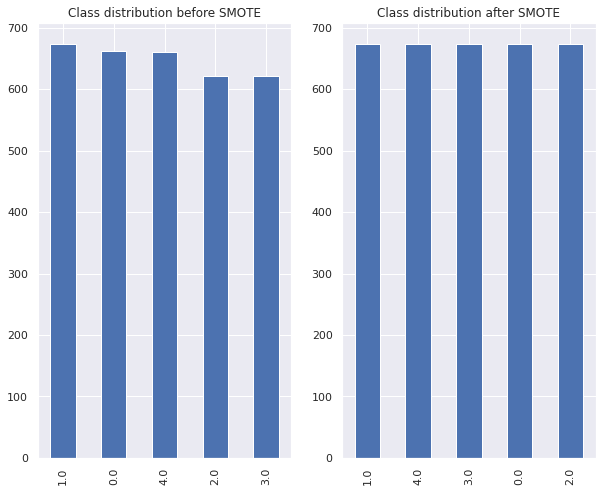

In [ ]:
sns.set(style='darkgrid')
plt.figure(figsize = (10, 8))
plt.subplot(1, 2, 1)
plt.title('Class distribution before SMOTE')
y_train_before_smote.value_counts().plot(kind="bar")
plt.subplot(1, 2, 2)
plt.title('Class distribution after SMOTE')
y_train.value_counts().plot(kind="bar")
plt.show()

# Data Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

In [ ]:
evaluation = pd.DataFrame({'Model': [],
                           'Accuracy(train)':[],
                           'Precision(train)':[],
                           'Recall(train)':[],
                           'F1_score(train)':[],
                           'Accuracy(test)':[],
                           'Precision(test)':[],
                           'Recall(test)':[],
                           'F1_score(test)':[]})

In [ ]:
def calc_train_test_accuracy(clf):
  evaluation_metrics = list()
  acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
  precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
  recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
  f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')

  acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
  precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
  recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
  f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')
  
  evaluation_metrics = [acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test];
  return evaluation_metrics


In [ ]:
def sort_models_test_accuracy(model,clf_eval_metrics):
  r = evaluation.shape[0]
  aa = list()
  aa.append(model)
  aa.extend(clf_eval_metrics)
  evaluation.loc[r] = aa
  


In [ ]:
def fit_models(model,clf):
  clf.fit(X_train, y_train)
  eval_metrics = calc_train_test_accuracy(clf)
  sort_models_test_accuracy(model, eval_metrics)

In [ ]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier as gb
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.ensemble import RandomForestClassifier as rnf
from sklearn.ensemble import AdaBoostClassifier as ada
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.neural_network import MLPClassifier as mlp
from sklearn import svm, datasets
from sklearn.ensemble import HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
# evaluate lightgbm histogram gradient boosting algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
# evaluate xgboost histogram gradient boosting algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

In [ ]:
xgb_clf = xgb.XGBClassifier(random_state=700)
gb_clf = gb()
knn_clf = knn(n_neighbors=1)
gnb_clf = gnb()
rnf_clf = rnf(max_depth=2, random_state=42)
ada_clf = ada(n_estimators=100, random_state=0)
dt_clf = dt(random_state=0)
mlp_clf = mlp(random_state=1, max_iter=300)
svc = svm.SVC()
lgbm = LGBMClassifier(random_state=42)
xtra_trees = ExtraTreesClassifier(random_state=2)
hgb = HistGradientBoostingClassifier(max_bins=100, max_iter=100, random_state=42)
hgb_lgbm = LGBMClassifier(max_bin=255, n_estimators=100)
hgb_xgb = XGBClassifier(tree_method='approx', max_bin=100, n_estimators=100)
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
svc_clf = GridSearchCV(svc, parameters)

# Cross Validation

In [ ]:
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision_macro'],
              "Mean Training Precision": results['train_precision_macro'].mean(),
              "Training Recall scores": results['train_recall_macro'],
              "Mean Training Recall": results['train_recall_macro'].mean(),
              "Training F1 scores": results['train_f1_macro'],
              "Mean Training F1 Score": results['train_f1_macro'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision_macro'],
              "Mean Validation Precision": results['test_precision_macro'].mean(),
              "Validation Recall scores": results['test_recall_macro'],
              "Mean Validation Recall": results['test_recall_macro'].mean(),
              "Validation F1 scores": results['test_f1_macro'],
              "Mean Validation F1 Score": results['test_f1_macro'].mean()
              }

In [ ]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.bar_label(ax.containers[0])
        plt.bar_label(ax.containers[1])
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_1 = scaler.fit_transform(X)
classifiers = [
    hgb_xgb,
    hgb,
    hgb_lgbm,
    xtra_trees,
    lgbm,

    svc,
    dt_clf,
    knn_clf,
    gnb_clf,
    
    ada_clf,
    xgb_clf,
    rnf_clf,
    mlp_clf,
    svc_clf,
    gb_clf
   ]
cv_results = []
for classifier in classifiers :
    print(classifier)
    cv_results.append(cross_validation(classifier, X_1, y, 5))

In [ ]:
results = pd.DataFrame(cv_results)


result_classifiers = [
    hgb_xgb,
    hgb,
    hgb_lgbm,
    xtra_trees,
    lgbm,

    svc,
    dt_clf,
    knn_clf,
    gnb_clf,
    
    ada_clf,
    xgb_clf,
    rnf_clf,
    mlp_clf,
    svc_clf,
    gb_clf
    
    ]

results['model_name']=result_classifiers
results

,Training Accuracy scores,Mean Training Accuracy,Training Precision scores,Mean Training Precision,Training Recall scores,Mean Training Recall,Training F1 scores,Mean Training F1 Score,Validation Accuracy scores,Mean Validation Accuracy,Validation Precision scores,Mean Validation Precision,Validation Recall scores,Mean Validation Recall,Validation F1 scores,Mean Validation F1 Score,model_name
0,"[1.0, 1.0, 1.0, 1.0, 1.0]",100.000000,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,"[0.6888888888888889, 0.6777777777777778, 0.702...",69.054281,"[0.6816493740096885, 0.6716912546052674, 0.697...",0.685543,"[0.6892057325663927, 0.6786990103836129, 0.703...",0.691235,"[0.6830716013970313, 0.673233974354331, 0.6984...",0.686149,"XGBClassifier(base_score=None, booster=None, c..."
1,"[1.0, 1.0, 1.0, 1.0, 1.0]",100.000000,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,"[0.6938271604938272, 0.6888888888888889, 0.704...",69.721070,"[0.6883378230635299, 0.6859679398723086, 0.699...",0.693045,"[0.6942270524836566, 0.6897253652902045, 0.705...",0.697876,"[0.6900044962479068, 0.6872984693604065, 0.701...",0.694535,"HistGradientBoostingClassifier(max_bins=100, r..."
2,"[1.0, 1.0, 1.0, 1.0, 1.0]",100.000000,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,"[0.6876543209876543, 0.7024691358024692, 0.718...",70.561339,"[0.6828064591097625, 0.6986675196555012, 0.715...",0.701984,"[0.6879372729232738, 0.7031978773036751, 0.719...",0.706122,"[0.6839850419279292, 0.6998970290816766, 0.715...",0.702796,LGBMClassifier(max_bin=255)
3,"[1.0, 1.0, 1.0, 1.0, 1.0]",100.000000,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,"[0.6864197530864198, 0.6925925925925925, 0.692...",68.955394,"[0.6782325555079043, 0.6872526352820089, 0.687...",0.684844,"[0.6869025317821793, 0.6936141102833093, 0.693...",0.690223,"[0.6783425285011553, 0.687838491425059, 0.6870...",0.684320,ExtraTreesClassifier(random_state=2)
4,"[1.0, 1.0, 1.0, 1.0, 1.0]",100.000000,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,"[0.6876543209876543, 0.7024691358024692, 0.718...",70.561339,"[0.6828064591097625, 0.6986675196555012, 0.715...",0.701984,"[0.6879372729232738, 0.7031978773036751, 0.719...",0.706122,"[0.6839850419279292, 0.6998970290816766, 0.715...",0.702796,LGBMClassifier(random_state=42)
5,"[0.6943501080580426, 0.7023772769373263, 0.692...",69.930812,"[0.6931451624378372, 0.6984880435801571, 0.689...",0.696428,"[0.6943435977479828, 0.7022844591717246, 0.692...",0.699306,"[0.6877812580408977, 0.6959451798832216, 0.686...",0.693328,"[0.6419753086419753, 0.6382716049382716, 0.635...",63.793557,"[0.634569335572975, 0.6349583110273678, 0.6259...",0.631792,"[0.642304135608099, 0.6388694176014479, 0.6360...",0.638140,"[0.6312995243822275, 0.6333575223767947, 0.626...",0.629743,SVC()
6,"[1.0, 1.0, 1.0, 1.0, 1.0]",100.000000,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,"[0.5160493827160494, 0.4876543209876543, 0.529...",51.074181,"[0.5112281374777833, 0.48259767037287365, 0.53...",0.508562,"[0.5164947423616684, 0.48844475639467283, 0.52...",0.511055,"[0.5117329217320938, 0.48493823643861467, 0.53...",0.508913,DecisionTreeClassifier(random_state=0)
7,"[1.0, 1.0, 1.0, 1.0, 1.0]",100.000000,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,"[0.528395061728395, 0.5271604938271605, 0.5, 0...",53.026355,"[0.5534471357004718, 0.5522138999212169, 0.520...",0.553605,"[0.5313016807055441, 0.5306444255403642, 0.503...",0.533233,"[0.5101818489844059, 0.5129009510438355, 0.484...",0.515285,KNeighborsClassifier(n_neighbors=1)
8,"[0.4152516208706391, 0.41309046001852423, 0.41..

In [ ]:
results.to_csv('results.csv', index=False, encoding='utf-8')

# 2nd way cv (for gb clf only)

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_1 = scaler.fit_transform(X)
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion="entropy",
                                     random_state=0)
decision_tree_result = cross_validation(gb_clf, X_1, y, 5)
print(decision_tree_result)

{'Training Accuracy scores': array([0.84748379, 0.84624884, 0.85304106, 0.84933621, 0.84938272]), 'Mean Training Accuracy': 84.90985253031151, 'Training Precision scores': array([0.84774612, 0.84636206, 0.85347231, 0.85000689, 0.84924742]), 'Mean Training Precision': 0.8493669609476455, 'Training Recall scores': array([0.84781612, 0.84648906, 0.85347022, 0.84968848, 0.84970233]), 'Mean Training Recall': 0.849433242273095, 'Training F1 scores': array([0.8464497 , 0.84496216, 0.85225992, 0.84848661, 0.84856844]), 'Mean Training F1 Score': 0.8481453639962371, 'Validation Accuracy scores': array([0.65802469, 0.67037037, 0.67037037, 0.64814815, 0.68108776]), 'Mean Validation Accuracy': 66.56002685833752, 'Validation Precision scores': array([0.65201239, 0.66735751, 0.66608035, 0.64453306, 0.67730751]), 'Mean Validation Precision': 0.661458161576953, 'Validation Recall scores': array([0.65837914, 0.6712141 , 0.67105734, 0.64966074, 0.68160268]), 'Mean Validation Recall': 0.6663827998763143, 

In [ ]:
cv_results.append(decision_tree_result)

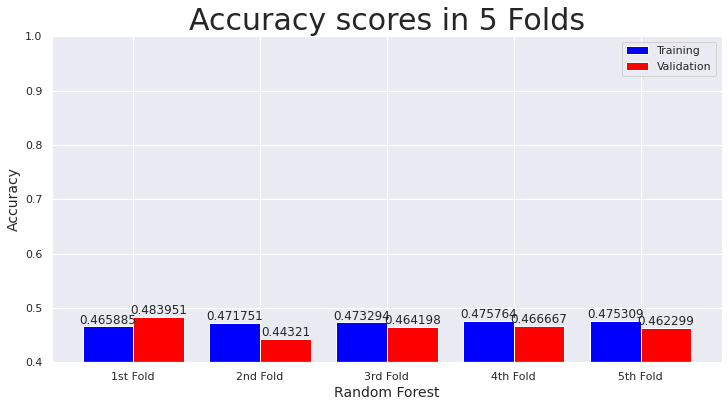

In [ ]:
# Plot Accuracy Result
model_name = "Random Forest"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            decision_tree_result["Training Accuracy scores"],
            decision_tree_result["Validation Accuracy scores"])




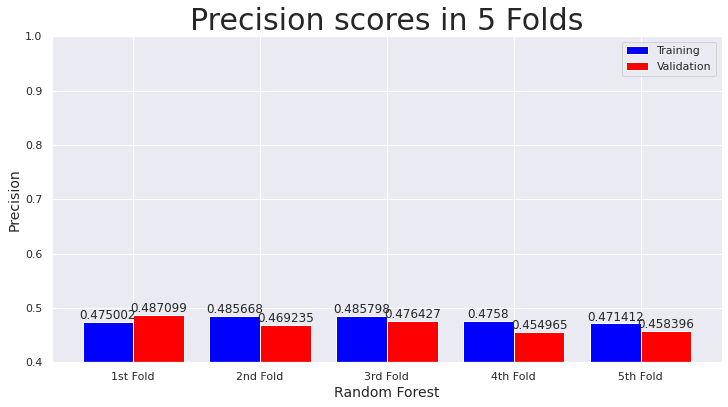

In [ ]:
# Plot Precision Result
plot_result(model_name,
            "Precision",
            "Precision scores in 5 Folds",
            decision_tree_result["Training Precision scores"],
            decision_tree_result["Validation Precision scores"])

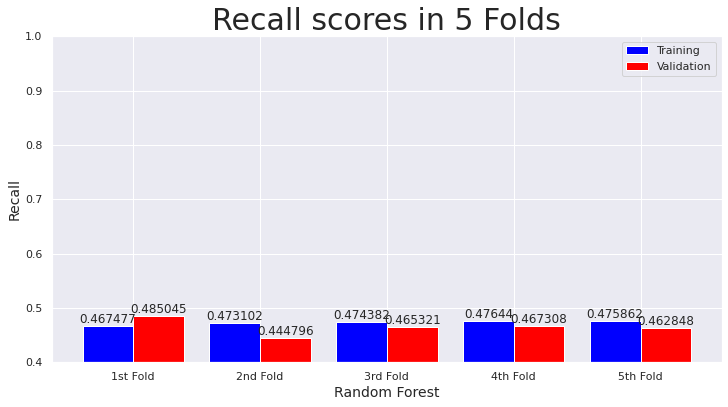

In [ ]:


# Plot Recall Result
plot_result(model_name,
            "Recall",
            "Recall scores in 5 Folds",
            decision_tree_result["Training Recall scores"],
            decision_tree_result["Validation Recall scores"])

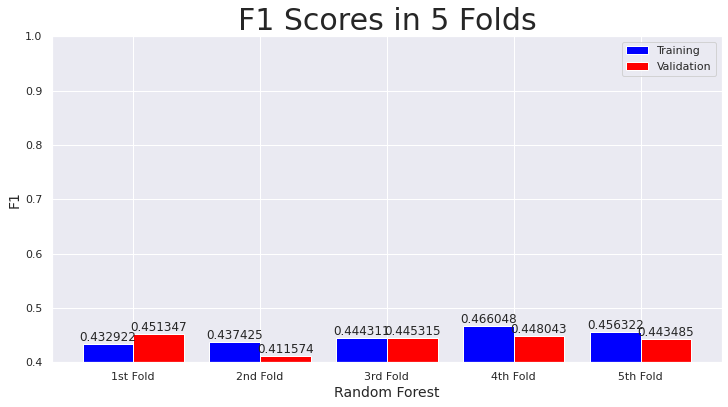

In [ ]:

# Plot F1-Score Result
plot_result(model_name,
            "F1",
            "F1 Scores in 5 Folds",
            decision_tree_result["Training F1 scores"],
            decision_tree_result["Validation F1 scores"])

# 10 Fold CV

In [ ]:
#@title 10 fold cross validation
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)
# Modeling step Test differents algorithms 
random_state = 2
classifiers = [
    hgb_xgb,
    hgb,
    hgb_lgbm,
    xtra_trees,
    lgbm,

    svc,
    dt_clf,
    gb_clf,
    knn_clf,
    gnb_clf,
    
    ada_clf,
    xgb_clf,
    rnf_clf,
    mlp_clf,
    svc_clf]
cv_results = []
for classifier in classifiers :
    print(classifier)
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":[
    "Histogram Gradient Boosting + XGBoost", 
    "Histogram Gradient Boosting", 
    "Histogram Gradient Boosting + LightGBM" , 
    "Extratrees",
    "LightGBM",
    "SVM",
    "DecisionTree",
    "GradientBoosting",
    "KNN",
    "Gaussian Naive Bayes",
    "XGBoost","RandomForest","MLPClassifier","SVM_Grid_Search"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

# Model fit

In [ ]:
fit_models('Xtra Trees',xtra_trees)
fit_models('XGBOOST',xgb_clf)
fit_models('GradientBoosting',gb_clf)
fit_models('KNN',knn_clf)
fit_models('Guassian Naive Bayes',gnb_clf)
fit_models('Random Forest',rnf_clf)
fit_models('AdaBoost',ada_clf)
fit_models('Decision Tree',dt_clf)
fit_models('MLP',mlp_clf)
fit_models('SVM',svc)
fit_models('LightGBM',lgbm)
fit_models('Histogram Gradient Boosting',hgb)
fit_models('Histogram Gradient Boosting With XGBoost',hgb_xgb)
fit_models('Histogram Gradient Boosting With LightGBM',hgb_lgbm)
fit_models("SVM_Grid_Search",svc_clf)

# Evaluation Metrics Comparison Table

In [ ]:
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recall(test),F1_score(test)
10,LightGBM,0.999,0.999,0.999,0.999,0.720,0.714,0.718,0.714
13,Histogram Gradient Boosting With LightGBM,0.999,0.999,0.999,0.999,0.720,0.714,0.718,0.714
11,Histogram Gradient Boosting,1.000,1.000,1.000,1.000,0.719,0.715,0.717,0.715
0,Xtra Trees,1.000,1.000,1.000,1.000,0.701,0.694,0.701,0.694
9,SVM,0.694,0.690,0.694,0.689,0.698,0.689,0.695,0.688
14,SVM_Grid_Search,0.872,0.875,0.872,0.872,0.695,0.685,0.692,0.687
2,GradientBoosting,0.846,0.847,0.846,0.845,0.686,0.678,0.685,0.678
1,XGBOOST,0.770,0.775,0.770,0.768,0.683,0.678,0.681,0.674
8,MLP,0.705,0.716,0.705,0.704,0.673,0.681,0.670,0.668
12,Histogram Gradient Boosting With XGBoost,0.768,0.771,0.768,0.766,0.669,0.662,0.667,0.660


In [ ]:
evaluation.to_csv('df_smoted.csv', index=False, encoding='utf-8')

# Confusion Matrix

In [ ]:
def plot_confusion_matrix(clf):
    pred_train=clf.predict(X_train)
    y_score_train = pred_train
    pred_train=pd.DataFrame(pred_train)

    # pred_train=pred_train.replace([0,1,2,3], ["B","N","SP","TO"])

    pred_test=clf.predict(X_test)
    y_score_test = pred_test
    # y_test=y_test.replace([0,1,2,3], ["B","N","SP","TO"])
    pred_test=pd.DataFrame(pred_test)

    # pred_test=pred_test.replace([0,1,2,3], ["B","N","SP","TO"])

    skplt.metrics.plot_confusion_matrix(
        y_train, 
        pred_train,
        figsize=(7,4),
        title_fontsize='18',
        text_fontsize='16',
        title =' ',
        cmap='Blues'
        )

    skplt.metrics.plot_confusion_matrix(
        y_test, 
        pred_test,
        figsize=(7,4),
        title_fontsize='18',
        text_fontsize='16',
        title =' ',
        cmap='Blues'
        )


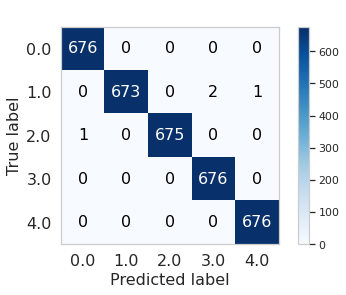

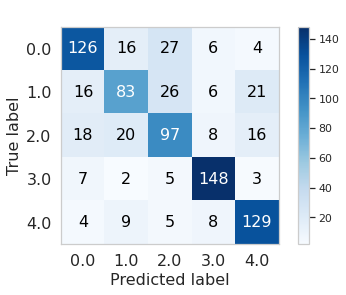

In [ ]:
plot_confusion_matrix(lgbm)

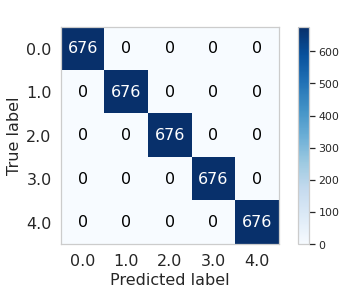

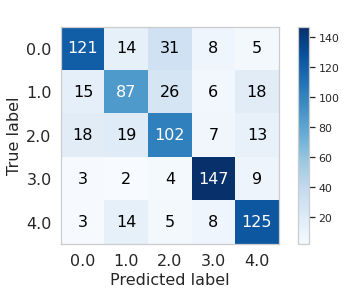

In [ ]:
plot_confusion_matrix(hgb)

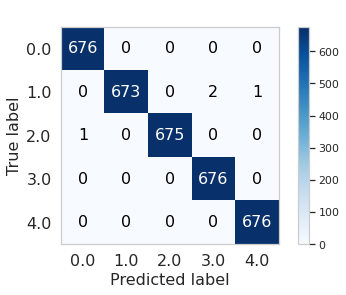

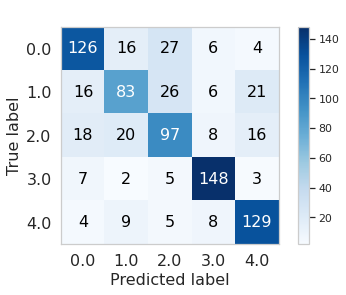

In [ ]:
plot_confusion_matrix(hgb_lgbm)

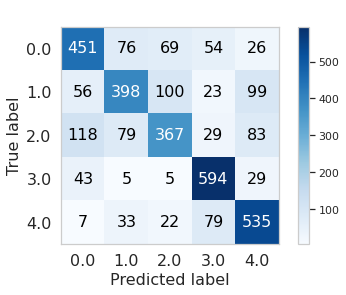

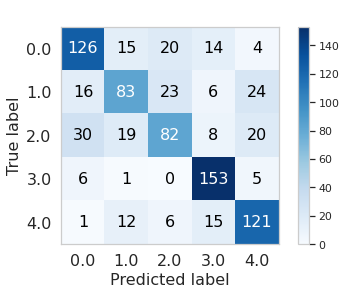

In [ ]:
plot_confusion_matrix(svc)

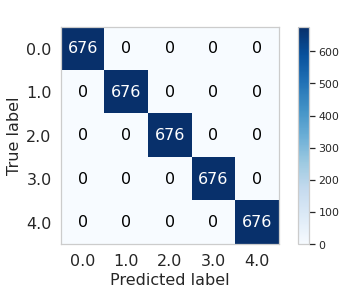

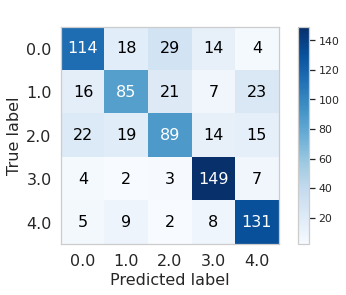

In [ ]:
plot_confusion_matrix(xtra_trees)

# Histogram Gradient Boosting
https://machinelearningmastery.com/histogram-based-gradient-boosting-ensembles/
https://www.analyticsvidhya.com/blog/2022/01/histogram-boosting-gradient-classifier/

# Lazy Classifier

In [ ]:
!pip install pyforest
!pip install lazypredict

In [ ]:
import pyforest
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [ ]:
len(y_test)

831

In [ ]:
clf = LazyClassifier(verbose=0, predictions=True, ignore_warnings=False, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

In [ ]:
predictions

In [ ]:
from sklearn.metrics import classification_report
for i in predictions.columns.tolist():
    print('\t\t',i,'\n')
    print(classification_report(y_test, predictions[i]),'\n')

In [ ]:
models['models'] = models.index

In [ ]:
models.to_csv('lazy_classifier_evaluation.csv', index=False, encoding='utf-8')